In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
ages = np.arange(60,101)

In [14]:
# Adjust coefficient dictionaries to include Medium and Bad health explicitly
coeffs_female = {
    "Limitation Category 1": {
        "Age": -0.185,
        "Age squared": 0.002,
        "Good health": -2.190,
        "Medium health": -0.814,
        "Bad health": 0.118,
        "Constant": 4.264,
    },
    "Limitation Category 2": {
        "Age": -0.524,
        "Age squared": 0.004,
        "Good health": 12.202,
        "Medium health": 14.205,
        "Bad health": 16.052,
        "Constant": -1.236,
    },
    "Limitation Category 3": {
        "Age": -0.658,
        "Age squared": 0.005,
        "Good health": -3.755,
        "Medium health": -2.136,
        "Bad health": 0.241,
        "Constant": 17.559,
    },
}

coeffs_male = {
    "Limitation Category 1": {
        "Age": -0.242,
        "Age squared": 0.002,
        "Good health": -1.883,
        "Medium health": -0.639,
        "Bad health": 0.464,
        "Constant": 4.934,
    },
    "Limitation Category 2": {
        "Age": -0.687,
        "Age squared": 0.005,
        "Good health": -3.359,
        "Medium health": -1.454,
        "Bad health": 0.894,
        "Constant": 21.584,
    },
    "Limitation Category 3": {
        "Age": -0.679,
        "Age squared": 0.005,
        "Good health": -2.922,
        "Medium health": -1.334,
        "Bad health": 1.072,
        "Constant": 19.526,
    },
}

In [15]:
def calculate_probabilities_for_health(coeffs, ages, health_category):
    """Compute limitations with ADL probabilities for a given health category"""
    logits = {category: coeffs[category]["Constant"] +
              coeffs[category]["Age"] * ages +
              coeffs[category]["Age squared"] * (ages**2) +
              coeffs[category][health_category]  # Only the selected health category is active
              for category in coeffs}

    exp_logits = {category: np.exp(logits[category]) for category in logits}
    
    # Compute denominator: 1 + sum(exp(logits)) (assuming baseline category is 1)
    denominator = 1 + sum(exp_logits.values())

    probabilities = {category: exp_logits[category] / denominator for category in logits}
    
    return probabilities

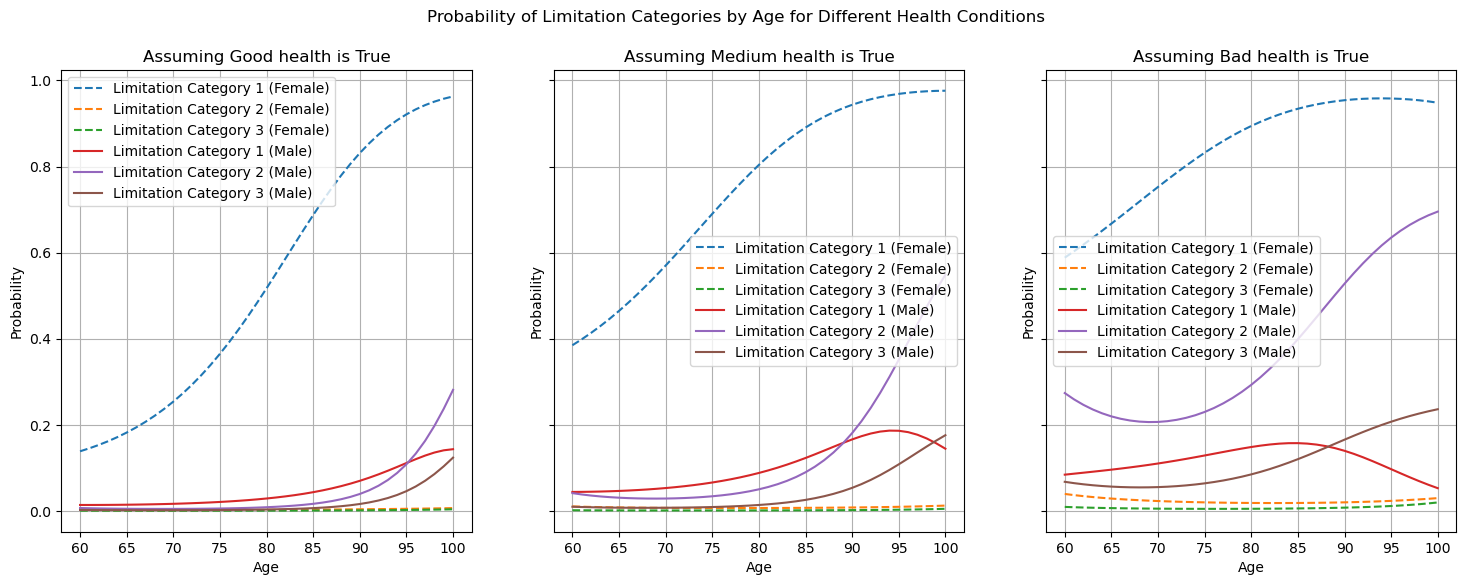

In [17]:
def plot_probabilities_by_health(coeffs_female, coeffs_male, ages):
    """Plot probability of limitation categories by age for different health conditions."""
    health_categories = ["Good health", "Medium health", "Bad health"]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle("Probability of Limitation Categories by Age for Different Health Conditions")
    
    for i, health in enumerate(health_categories):
        probabilities_female = calculate_probabilities_for_health(coeffs_female, ages, health)
        probabilities_male = calculate_probabilities_for_health(coeffs_male, ages, health)
        
        ax = axes[i]
        for category in probabilities_female:
            ax.plot(ages, probabilities_female[category], label=f"{category} (Female)", linestyle='dashed')
        for category in probabilities_male:
            ax.plot(ages, probabilities_male[category], label=f"{category} (Male)")
        
        ax.set_xlabel("Age")
        ax.set_ylabel("Probability")
        ax.set_title(f"Assuming {health} is True")
        ax.legend()
        ax.grid(True)
    
    plt.show()

# Run the plot function
plot_probabilities_by_health(coeffs_female, coeffs_male, ages)

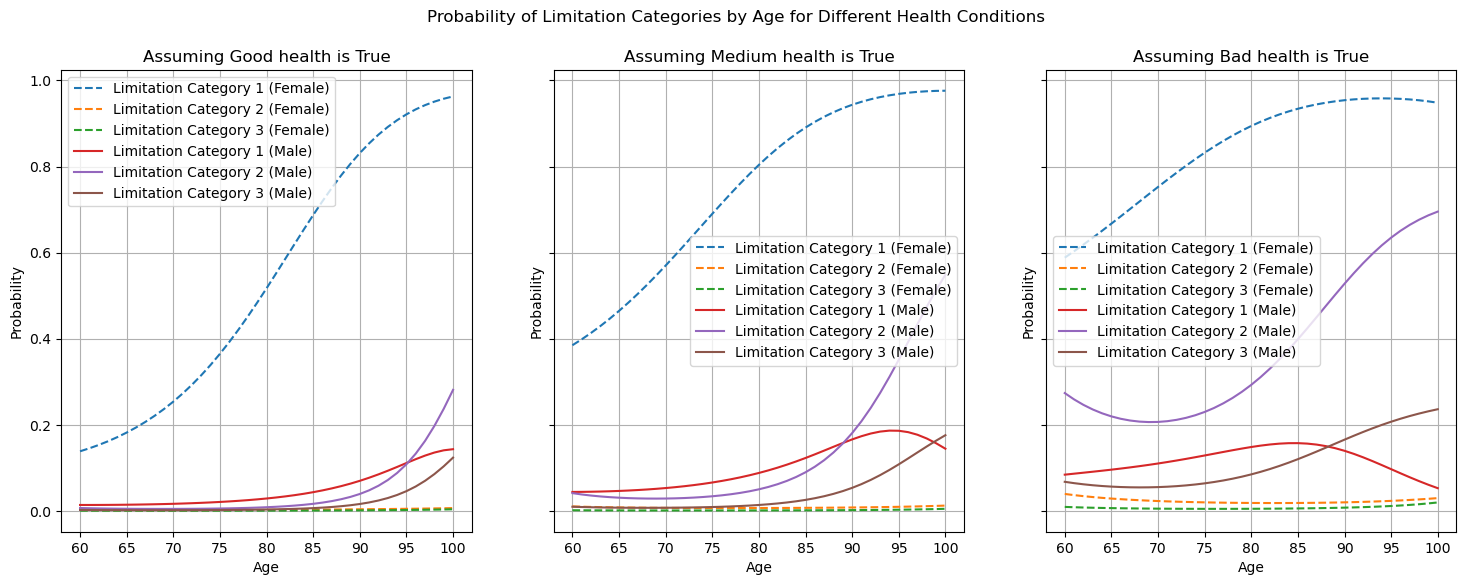

In [18]:
plot_probabilities_by_health(coeffs_female, coeffs_male, ages)

In [19]:
def plot_any_limitation_probability(coeffs_female, coeffs_male, ages):
    """Plot the probability of having any limitation (sum of all categories) for different health conditions."""
    health_categories = ["Good health", "Medium health", "Bad health"]
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for health in health_categories:
        probabilities_female = calculate_probabilities_for_health(coeffs_female, ages, health)
        probabilities_male = calculate_probabilities_for_health(coeffs_male, ages, health)
        
        prob_any_female = sum(probabilities_female.values())
        prob_any_male = sum(probabilities_male.values())
        
        ax.plot(ages, prob_any_female, label=f"Any Limitation (Female, {health})", linestyle='dashed')
        ax.plot(ages, prob_any_male, label=f"Any Limitation (Male, {health})")
    
    ax.set_xlabel("Age")
    ax.set_ylabel("Probability")
    ax.set_title("Probability of Any Limitation by Age for Different Health Conditions")
    ax.legend()
    ax.grid(True)
    
    plt.show()

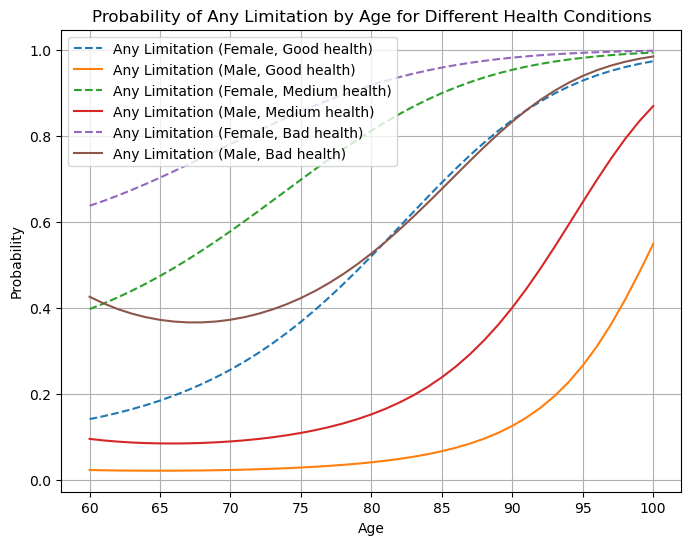

In [20]:
plot_any_limitation_probability(coeffs_female, coeffs_male, ages)